# Overview

This notebook demonstrates how to calculate and update the Matrix Profile.  
This notebook uses the same signal data which is generated by  
url : https://github.com/aouyang1/go-matrixprofile,  
file : matrixprofile/example_caseStudy_test.go,  
func : Example_caseStudy,  
line 235 :  fmt.Printf("Signal:         %.5f\n", sig)  

# Load Libraries

In [1]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load signal data

In [2]:
signal_df = pd.read_csv('01_signal.txt')
print('signal size is', len(signal_df))
signal_df.head()

signal size is 875


,signal
0,0.01047
1,0.35307
2,0.60424
3,0.80279
4,0.94352


# Visualize signal data

Text(0, 0.5, 'Signal')

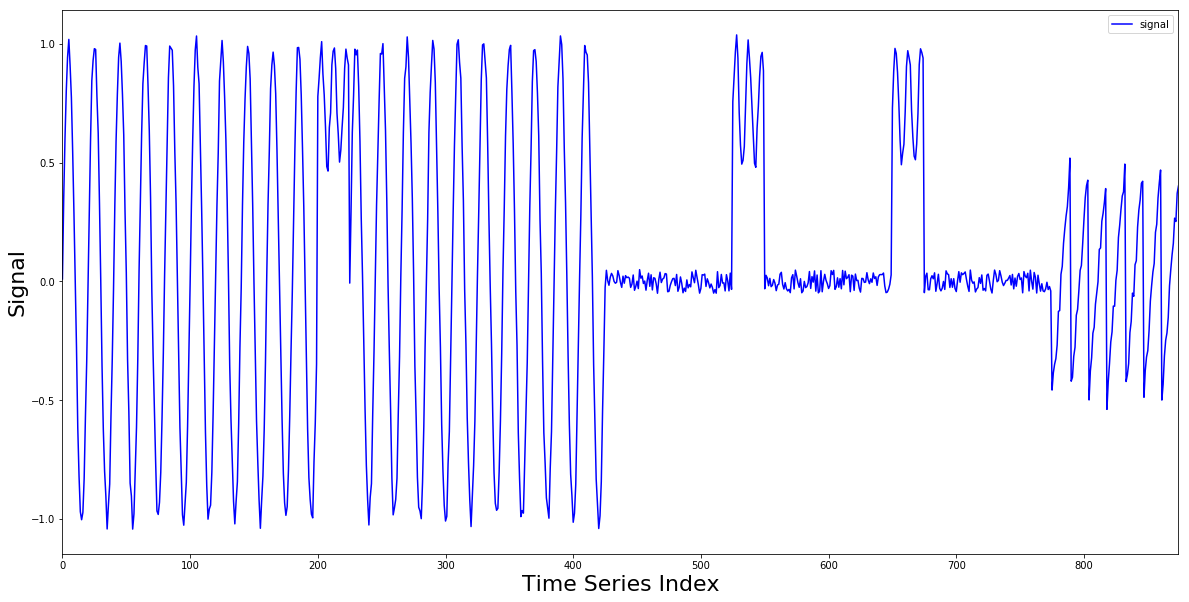

In [3]:
fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
signal_df.plot(ax=axe, kind='line', color='b')
axe.set_xlabel('Time Series Index', size=22)
axe.set_ylabel('Signal', size=22)

# Calculate Matrix Profile

In [4]:
# subsequence length m = 32 meaning
# 32Hz = 32 data point per 1sec
# 32HZ * 26sec = 832 data point count
# find matrix profile pattern of 26sec sequence by 1sec subsequences
m = 32
mp = matrixProfile.stomp(signal_df.signal.values, m)
print(len(mp), len(mp[0]), len(mp[1]))
# Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)
print(len(mp_adj))

2 844 844
875


# Visualize Matrix Profile

Text(0.5, 0, 'Time Series Index')

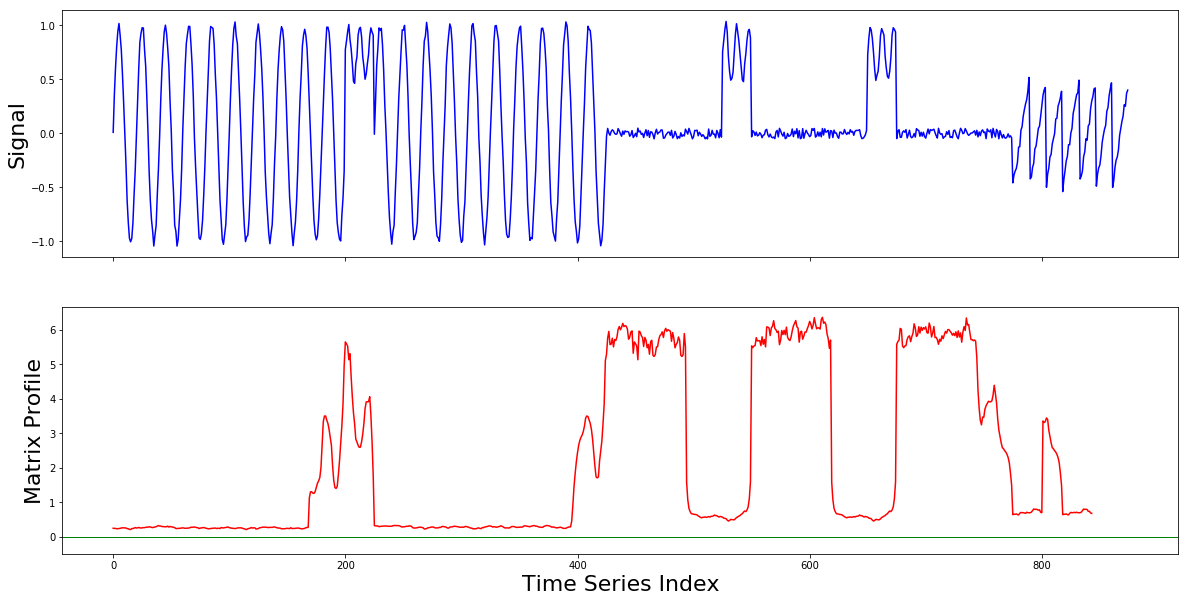

In [5]:
#Plot the signal data
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20,10))
axes[0].plot(np.arange(len(signal_df.signal.values)), signal_df.signal.values, color='b')
axes[0].set_ylabel('Signal', size=22)

#Plot the Matrix Profile
axes[1].plot(np.arange(len(mp_adj)), mp_adj, color='red')
axes[1].set_ylim(bottom=-0.5)
axes[1].axhline(y=0.0, color='g', linewidth=1)
axes[1].set_ylabel('Matrix Profile', size=22)
axes[1].set_xlabel('Time Series Index', size=22)

# STAMPI: sequentially update the Matrix Profile

We can introduce an anomaly to the end of the time series and use STAMPI to detect it

# Load signal + head 100 data

In [6]:
signal_values_merged = np.append(signal_df.signal.values, signal_df.signal.values[0:100])
print(len(signal_values_merged))

975


# Visualize signal + head 100 data

Text(0, 0.5, 'Signal')

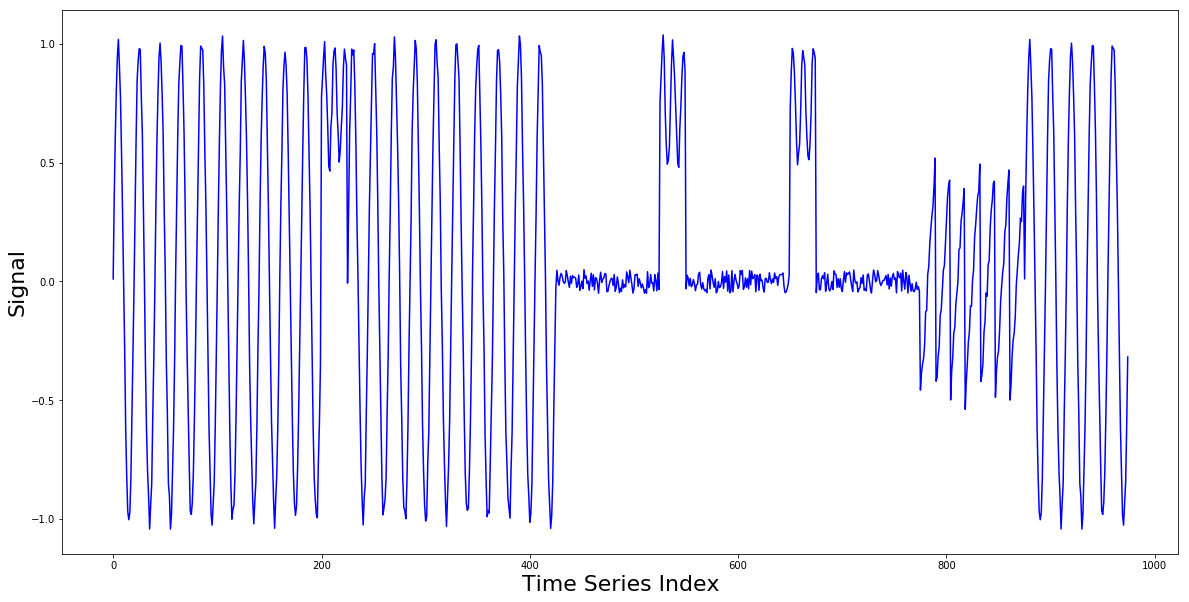

In [7]:
fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
axe.plot(np.arange(len(signal_values_merged)), signal_values_merged, color='b')
axe.set_xlabel('Time Series Index', size=22)
axe.set_ylabel('Signal', size=22)

# Update the Matrix Profile

In [8]:
mp_score = mp[0]
mp_index = mp[1]
signal_values_appended = signal_df.signal.values.copy()
for pattern_tmp in signal_df.signal.values[0:100]:
    mp_appended = matrixProfile.stampi_update(signal_values_appended,m,mp_score,mp_index,newval=pattern_tmp)
    signal_values_appended = np.append(signal_values_appended, pattern_tmp)
    mp_score = mp_appended[0]
    mp_index = mp_appended[1]
print(len(mp_appended), len(mp_appended[0]), len(mp_appended[1]), len(signal_values_appended))
# Append np.nan to Matrix profile to enable plotting against raw data
mp_adj2 = np.append(mp_appended[0],np.zeros(m-1)+np.nan)
print(len(mp_adj2))

2 944 944 975
975


# Visualize Matrix Profile

Text(0.5, 0, 'Time Series Index')

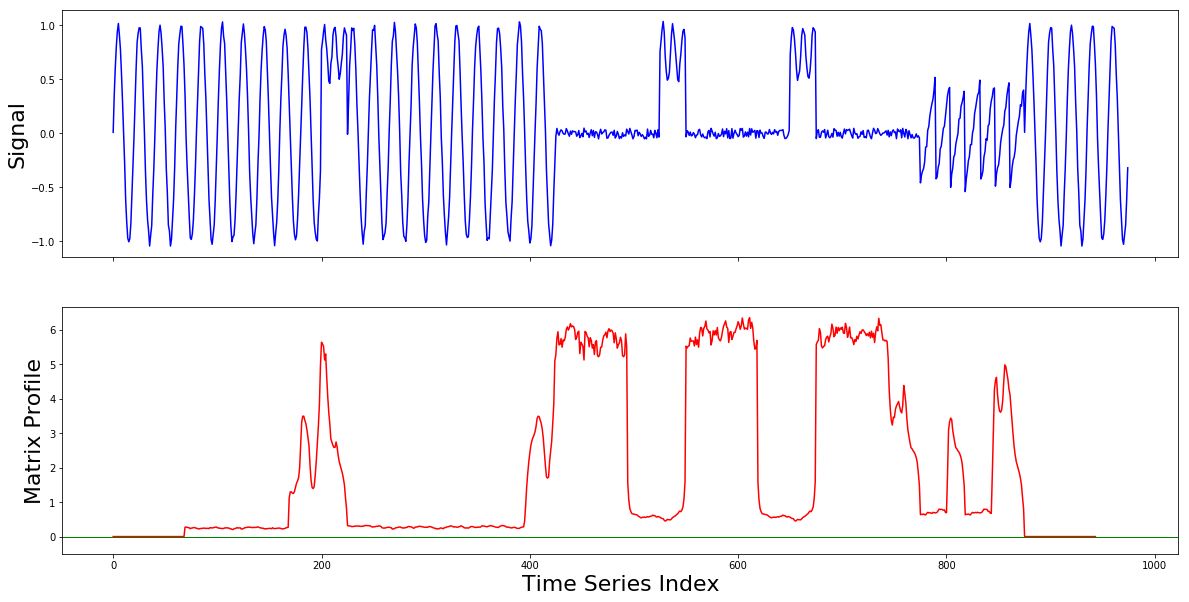

In [9]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(signal_values_merged)), signal_values_merged, color='b')
ax1.set_ylabel('Signal', size=22)

#Plot data
ax2.plot(np.arange(len(mp_adj2)), mp_adj2, color='r')
ax2.set_ylim(bottom=-0.5)
ax2.axhline(y=0.0, color='g', linewidth=1)
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Time Series Index', size=22)